#### 1.- Librerias

In [ ]:
#!pip install Basemap
#!pip install netCDF4
#!pip install cartopy
#!pip install basemap-data-hires


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 3.3 MB/s eta 0:00:00


In [ ]:
#-----------------------------------
# Library import
from mpl_toolkits.basemap import Basemap
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4
import os
#----------------------------------
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#----------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#----------------------------------
# Data
#path = "/Volumes/GoogleDrive-101458676915921006746/Mi unidad/WRF_Chem/datos_WRF/"
path = "drive/MyDrive/WRF_Chem/datos_WRF/"

print(os.listdir(path))
#nc = netCDF4.Dataset(path + "wrfout_d01_2023-11-08_00:00:00")
#print(nc)
image_nc15k = xr.open_dataset(path+"wrfout_d01_2023-11-08_00:00:00")
image_nc3k = xr.open_dataset(path+"wrfout_d02_2023-11-08_00:00:00")
#print(image_nc)
#---------------------------------

['wrfout_d01_2023-11-08_00:00:00', 'wrfout_d02_2023-11-08_00:00:00']


#### 2.- Plot de temperatura

In [ ]:
#image_nc15k.info()

In [ ]:
nc_dataT = image_nc15k["T2"]
nc_dataT2 = image_nc3k["T2"]

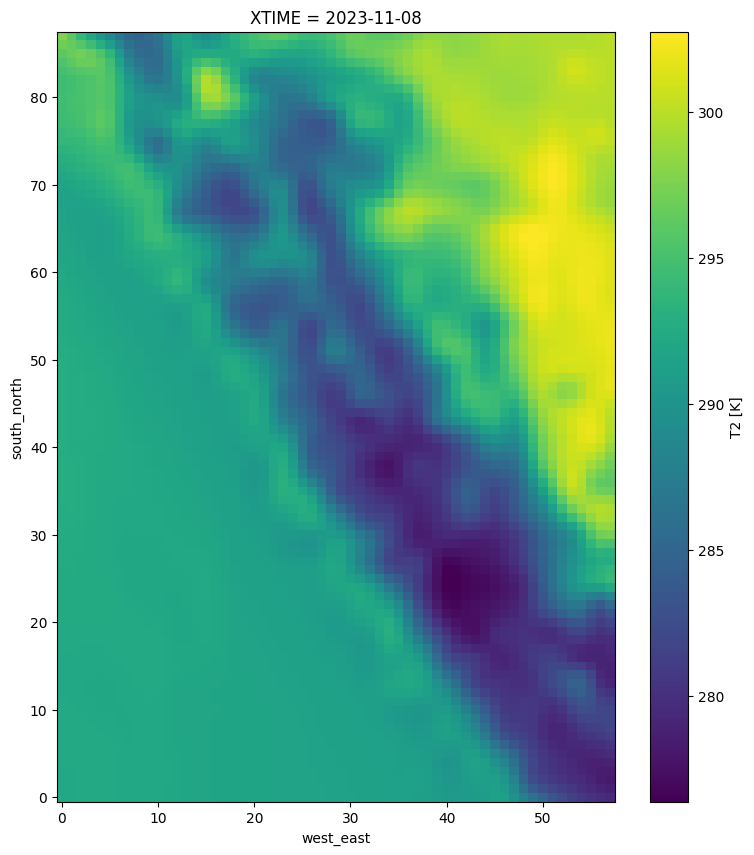

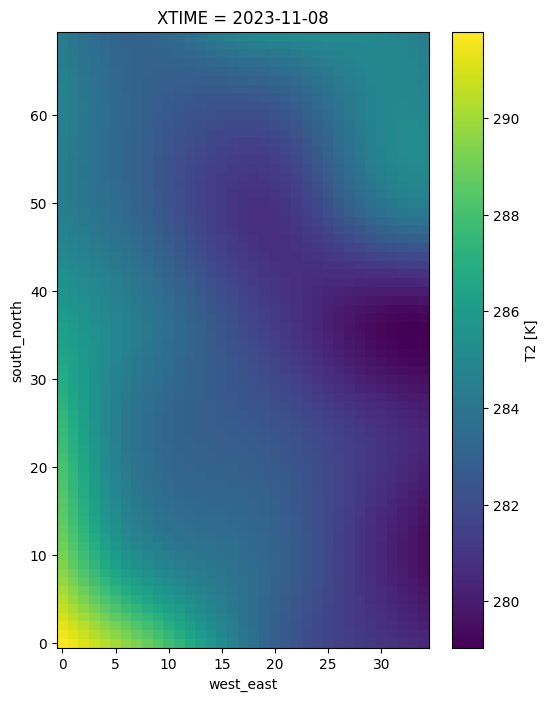

In [ ]:
#--------------------------------------
nc_dataT.plot(figsize=(9, 10))
plt.draw()
#--------------------------------------
nc_dataT2.plot(figsize=(6, 8))
plt.draw()
#--------------------------------------

In [ ]:
ds_wrf_rename_latlon = nc_dataT.rename({'south_north':'y', 'west_east':'x'})

ds_wrf_dropxlatlon = ds_wrf_rename_latlon.drop(['XLAT', 'XLONG'])
ds_wrf_dropxlatlon


<xarray.DataArray 'T2' (Time: 1, y: 88, x: 58)>
[5104 values with dtype=float32]
Coordinates:
    XTIME    (Time) datetime64[ns] ...
Dimensions without coordinates: Time, y, x
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:

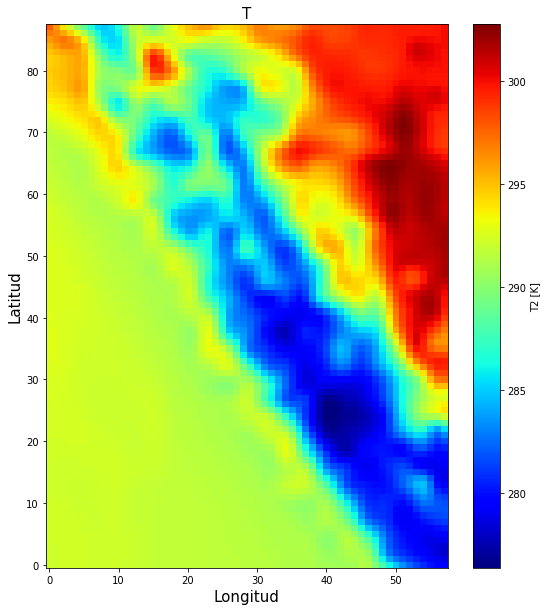

In [ ]:
# plot image
nc_data2d = nc_dataT.squeeze()
#
plt.figure( num=None, figsize=(9, 10))
nc_data2d.compute().plot.imshow(cmap="jet", vmin=np.min(nc_data2d),
                                               vmax=np.max(nc_data2d) )
# Add a colorbar
#plt.grid()
plt.title("T", fontsize=15)
#plt.axis("equal")
plt.xlabel("Longitud", fontsize=15)
plt.ylabel("Latitud", fontsize=15)
plt.show()

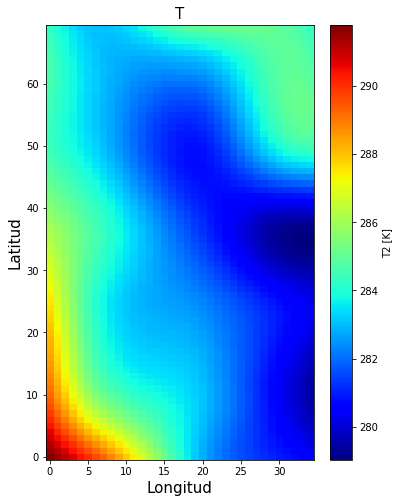

In [ ]:
# plot image
nc_data2d = nc_dataT2.squeeze()
#
#plt.figure()
plt.figure( num=None, figsize=(6, 8))
nc_data2d.compute().plot.imshow(cmap="jet", vmin=np.min(nc_data2d),
                                               vmax=np.max(nc_data2d) )
# Add a colorbar
#plt.grid()
plt.title("T", fontsize=15)
#plt.axis("equal")
plt.xlabel("Longitud", fontsize=15)
plt.ylabel("Latitud", fontsize=15)
plt.show()

Text(0, 0.5, 'Latitud')

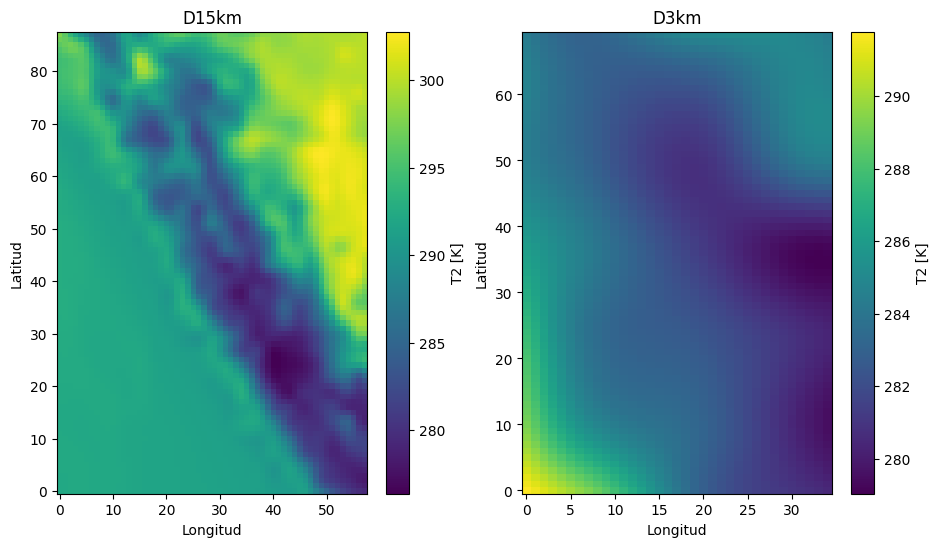

In [ ]:
plt.figure(figsize=[11,6])
#---------------------------------------------------------
plt.subplot(1,2,1)
diff = nc_dataT
diff.plot(vmin=np.min(nc_dataT), vmax=np.max(nc_dataT))
# Add a colorbar
plt.title("D15km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#---------------------------------------------------------
plt.subplot(1,2,2)
diff = nc_dataT2
diff.plot(vmin=np.min(nc_dataT2), vmax=np.max(nc_dataT2))
# Add a colorbar
plt.title("D3km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#---------------------------------------------------------


Text(0, 0.5, 'Latitud')

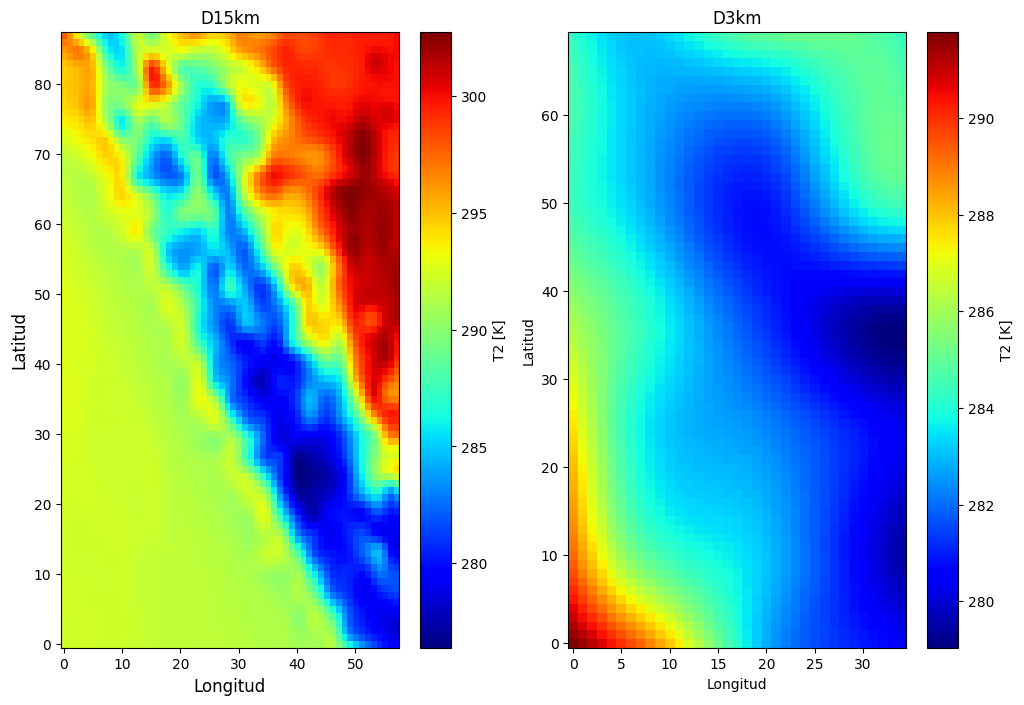

In [ ]:
#-----------------------------------------------------------------
# plot image
plt.figure( num=1, figsize=(12, 8))

#-----------------------------------------------------------------
plt.subplot(1,2,1)
nc_datad = nc_dataT.squeeze()
nc_datad.compute().plot.imshow(cmap="jet", vmin=np.min(nc_datad),
                                           vmax=np.max(nc_datad)  )
# Add a colorbar
plt.title("D15km", fontsize=12)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
#-----------------------------------------------------------------
plt.subplot(1,2,2)
nc_data2d = nc_dataT2.squeeze()
nc_data2d.compute().plot.imshow(cmap="jet", vmin=np.min(nc_data2d),
                                           vmax=np.max(nc_data2d) )
# Add a colorbar
plt.title("D3km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


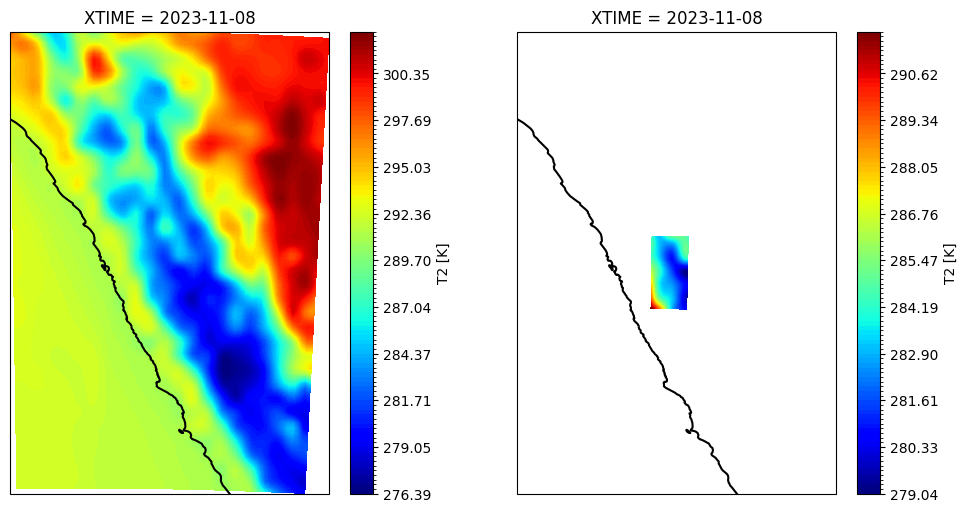

In [ ]:

lat = nc_dataT.coords['XLAT']
lon = nc_dataT.coords['XLONG']

nc_datad = nc_dataT.squeeze()
nc_data2d = nc_dataT2.squeeze()

fig, axarr = plt.subplots(ncols=2, nrows=1, subplot_kw={'projection':ccrs.PlateCarree()},
                          figsize=[12,6])


for ds, ax in zip([nc_datad, nc_data2d], axarr.flat ):
    ds.plot.contourf(ax=ax, levels=100, vmin=np.min(ds),vmax=np.max(ds),
                     x='XLONG', y='XLAT', transform=ccrs.PlateCarree(),
                     cmap="jet" )
    ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)],
                  ccrs.PlateCarree())
    ax.coastlines(resolution="10m",linewidth=1.5)



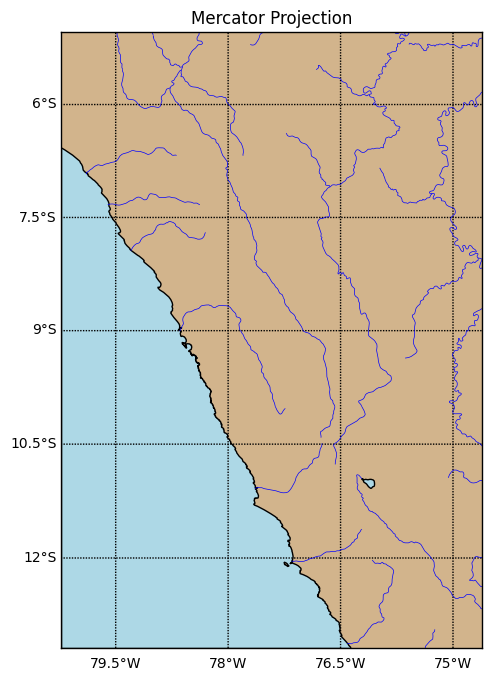

In [ ]:
fig = plt.figure(num=None, figsize=(12, 8) )
# Miller projection:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution="h")
#
m.drawcoastlines()

m.drawparallels(np.arange(-90.,91.,1.5),labels=[True,False,False,False],dashes=[1,1])
m.drawmeridians(np.arange(-180.,181.,1.5),labels=[False,False,False,True],dashes=[1,1])

m.fillcontinents(color='tan',lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')
#
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

plt.title("Mercator Projection")
plt.show()

In [ ]:
#https://docs.xarray.dev/en/latest/user-guide/plotting.html

#https://researchworkspace.com/file/2588789/plot-wind-vectors-from-grid.ipynb?preview=true

#### 3.- Plot velocidad de viento

In [ ]:
#IMPORT LIBRARIES
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [ ]:
#------------------------------------------

# 10-meter eastward wind m/s
U10M15k = image_nc15k['U10']
# 10-meter northward wind m/s
V10M15k = image_nc15k['V10']
#CALCULATE WIND SPEED
ws15k = np.sqrt(U10M15k**2 + V10M15k**2)
#------------------------------------------
# 10-meter eastward wind m/s
U10M3k = image_nc3k['U10']
# 10-meter northward wind m/s
V10M3k = image_nc3k['V10']
#CALCULATE WIND SPEED
ws3k = np.sqrt(U10M3k**2 + V10M3k**2)
#------------------------------------------


Text(0, 0.5, 'Latitud')

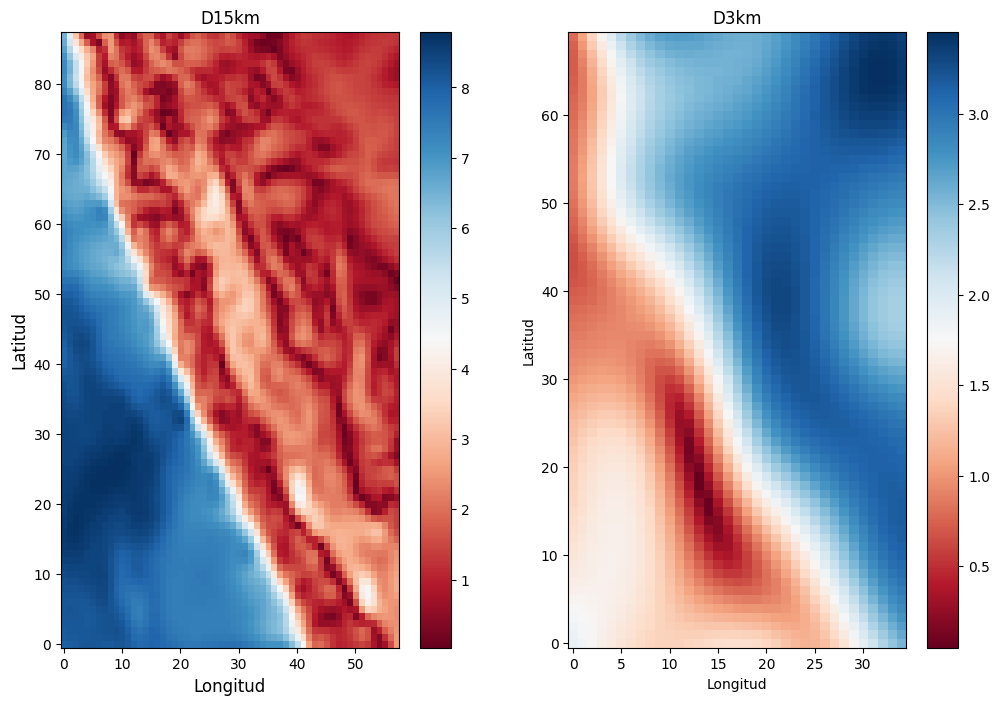

In [ ]:
# plot image
plt.figure( num=1, figsize=(12, 8))

#------------------------------------------------------------------
plt.subplot(1,2,1)
nc_ws15k = ws15k.squeeze()
nc_ws15k.compute().plot.imshow(cmap="RdBu", vmin=np.min(nc_ws15k),
                                           vmax=np.max(nc_ws15k)  )

# Add a colorbar
plt.title("D15km", fontsize=12)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
#------------------------------------------------------------------
plt.subplot(1,2,2)
nc_ws3k = ws3k.squeeze()
nc_ws3k.compute().plot.imshow(cmap="RdBu", vmin=np.min(nc_ws3k),
                                           vmax=np.max(nc_ws3k) )

# Add a colorbar
plt.title("D3km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shrink'
  result = super().contourf(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shrink'
  result = super().contourf(*args, **kwargs)


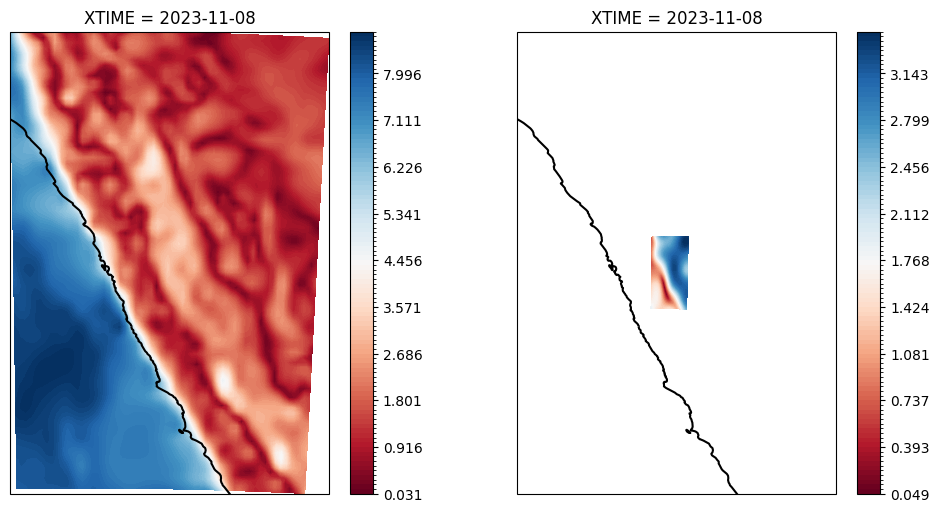

In [ ]:
lat = image_nc15k.coords['XLAT']
lon = image_nc15k.coords['XLONG']
#
nc_ws15k = ws15k.squeeze()
nc_ws3k = ws3k.squeeze()
#
fig, axarr = plt.subplots(ncols=2, nrows=1, subplot_kw={'projection':ccrs.PlateCarree()},
                          figsize=[12,6])

for ds, ax in zip([nc_ws15k, nc_ws3k], axarr.flat ):
    ds.plot.contourf(ax=ax, levels=100, vmin=np.min(ds), vmax=np.max(ds),
                     x='XLONG', y='XLAT', transform=ccrs.PlateCarree(), cmap="RdBu",
                     shrink=0.5)
    ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)],
                  ccrs.PlateCarree())
    ax.coastlines(resolution="10m",linewidth=1.5)



In [ ]:
#https://notebook.community/ajdawson/python_for_climate_scientists/course_content/notebooks/cartopy_intro

Text(0, 0.5, 'Latitud')

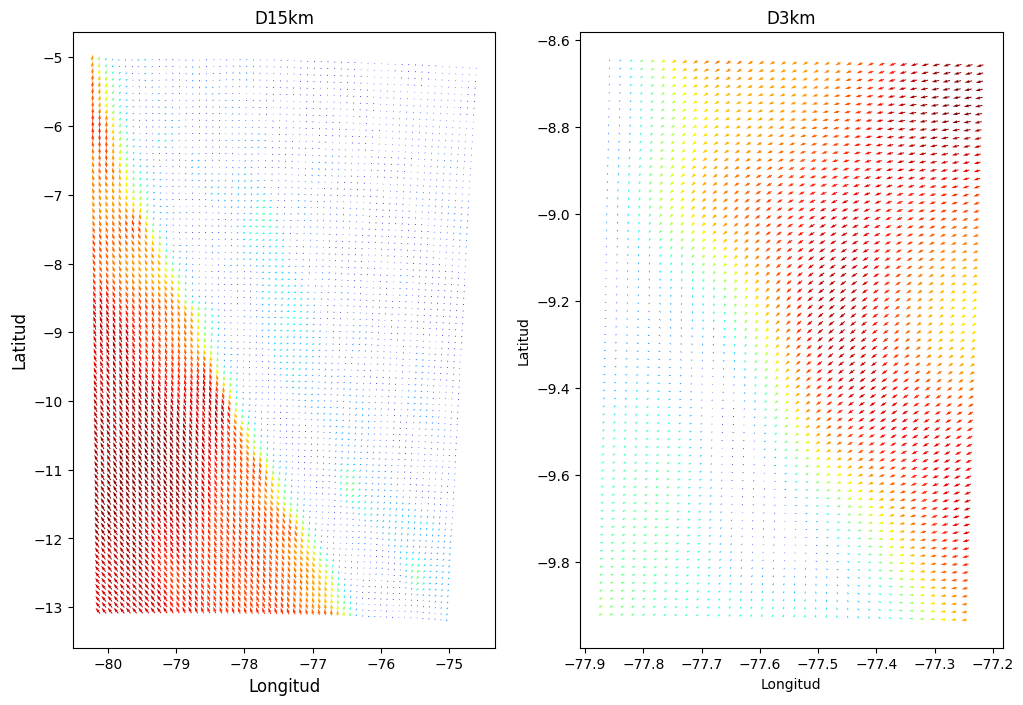

In [ ]:
#------------------------------------------
lat15k = nc_dataT.coords['XLAT']
lon15k = nc_dataT.coords['XLONG']

lat3k = nc_dataT2.coords['XLAT']
lon3k = nc_dataT2.coords['XLONG']
#------------------------------------------------------------------
# plot image
plt.figure( num=1, figsize=(12, 8))

#------------------------------------------------------------------
plt.subplot(1,2,1)
plt.quiver(lon15k, lat15k, U10M15k[0,:,:], V10M15k[0,:,:],ws15k[0,:,:] ,
             cmap='jet', linewidth=1 )

# Add a colorbar
plt.title("D15km", fontsize=12)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
#------------------------------------------------------------------
plt.subplot(1,2,2)
plt.quiver(lon3k, lat3k, U10M3k[0,:,:], V10M3k[0,:,:],ws3k[0,:,:] ,
             cmap='jet', linewidth=1 )

# Add a colorbar
plt.title("D3km", fontsize=12)
plt.xlabel("Longitud", fontsize=10)
plt.ylabel("Latitud", fontsize=10)
#------------------------------------------------------------------

#### 4.- Plot temperatura y velocidad de viento